# Explore here

Descarga los datos de Airbnb de Nueva York de Kaggle.com.
Realiza un EDA completo incluyendo todos los pasos del proceso.
Escribe las conclusiones de cada paso y analiza los resultados sobre las relaciones entre las variables.

In [106]:
#Los IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#Escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#Selecicon
from sklearn.feature_selection import f_classif, SelectKBest






In [54]:
# Importar data y convertirla a CSV
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv'
pd.read_csv(url).to_csv('../data/raw/AB_NYC_2019.csv', index=False)

In [55]:
# Cargar el dataset
df = pd.read_csv("../data/raw/AB_NYC_2019.csv")

In [56]:
# Mostrar las primeras 5 lineas del DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [57]:
# Resumen completo del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [58]:
# Forma del DataFrame (filas/columnas)
df.shape

(48895, 16)

Examinando el DataFrame

In [59]:
# Buscar duplicados en el DataFrame
duplicados = df.duplicated()
total_duplicados = duplicados.sum()
print(f"Hay un total de {total_duplicados} filas duplicadas en el DataFrame")

Hay un total de 0 filas duplicadas en el DataFrame


In [60]:
# Detalle de veces que se repite el -barrio- en el Dataframe
total_rep_barrio = df["neighbourhood"].value_counts()
print(total_rep_barrio)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64


In [61]:
# Detalle de los barrios por grupo en el DataFrame
grupo_barrios = df['neighbourhood_group'].value_counts()
print(grupo_barrios)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


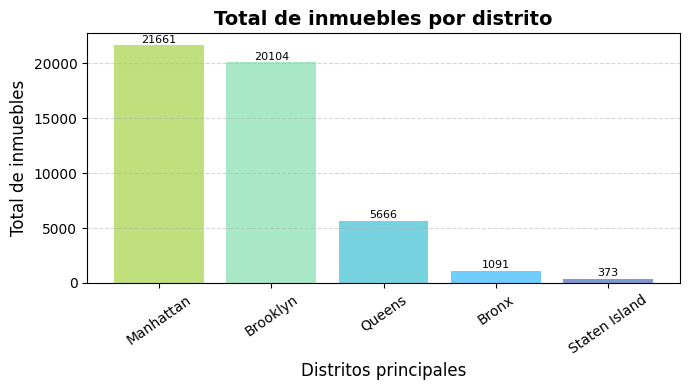

In [62]:
# Gráfico del detalle de inmuebles por distrito en el DataFrame

# Personalizar gráfico
plt.figure(figsize=(7, 4))
colors = ["#C0DF7D", "#A9E8C6", "#76D2DE", "#6FCEFD", "#7F97D3"][:len(conteo)]
bars = plt.bar(conteo.index, conteo.values, color=colors)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval),
             ha='center', va='bottom', fontsize=8)

# Personalizar etiquetas y estilo
plt.title("Total de inmuebles por distrito", fontsize=14, fontweight="bold")
plt.xlabel("Distritos principales", fontsize=12)
plt.ylabel("Total de inmuebles", fontsize=12)
plt.xticks(rotation=35)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Según el gráfico de "Total de inmuebles por distrito" se puede apreciar que, tanto Manhattan como Brooklyn tienen mayor oferta, mientras que Queens, el Bronx y Staten Island son los que por el contrario, su oferta disminuye abruptamente.

Text(0.5, 1.0, 'Distribución de inmuebles según distrito')

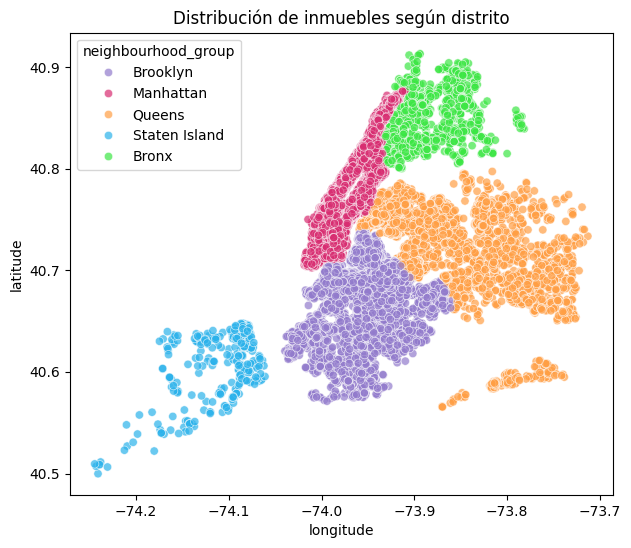

In [63]:
#Distribución de inmuebles según distrito
# Personalizar gráfico
plt.figure(figsize=(7,6))
colores = {"Manhattan": "#D82D71", "Brooklyn": "#927BCC", "Queens": "#FF9F45", "Bronx": "#3CE644","Staten Island": "#2BB2EB"}
sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group", palette=colores, data=df, alpha=0.7)

# Personalizar etiquetas y estilo
plt.title("Distribución de inmuebles según distrito")

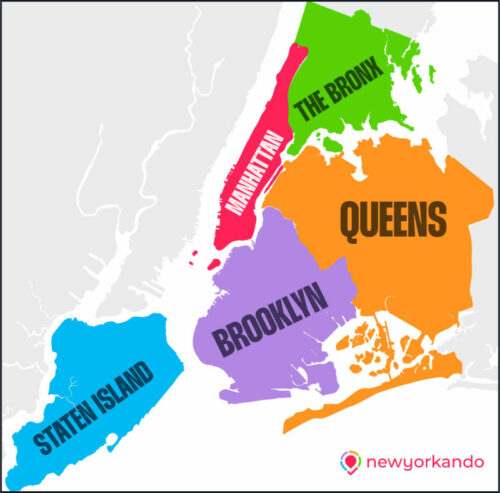

Como se puede ver en el gráifco anterior con este plano por distritos están muy bien delimitados los mismos...

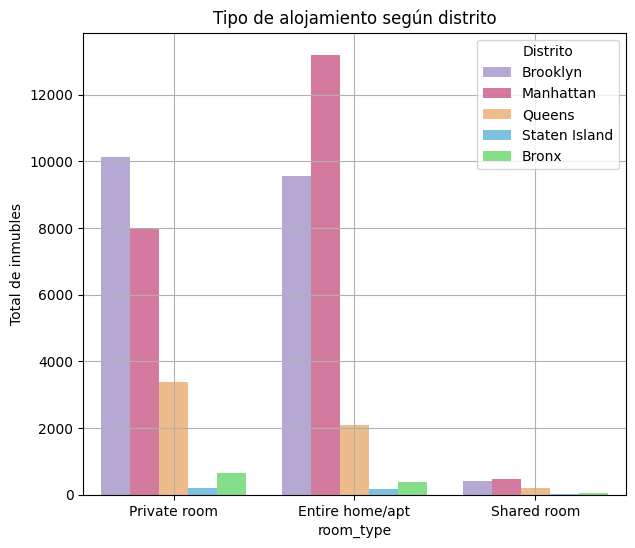

In [64]:
#Gráfica por tipo de alojamiento según distrito

# Personalizar gráfico
plt.figure(figsize=(7,6))
colores = {"Manhattan": "#D82D71", "Brooklyn": "#927BCC", "Queens": "#FF9F45", "Bronx": "#3CE644","Staten Island": "#2BB2EB"}
sns.countplot(df, x = 'room_type', hue='neighbourhood_group', palette=colores, alpha = 0.7)

# Personalizar etiquetas y estilo
plt.title('Tipo de alojamiento según distrito')
plt.ylabel('Total de inmubles')
plt.legend(title = 'Distrito')
plt.grid()
plt.show()

In [65]:
# Detalle del precio de cada inmueble en el DataFrame
precio_inmu = df["price"].value_counts()
print(precio_inmu)

price
100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
1080       1
1299       1
1295       1
519        1
1978       1
Name: count, Length: 674, dtype: int64


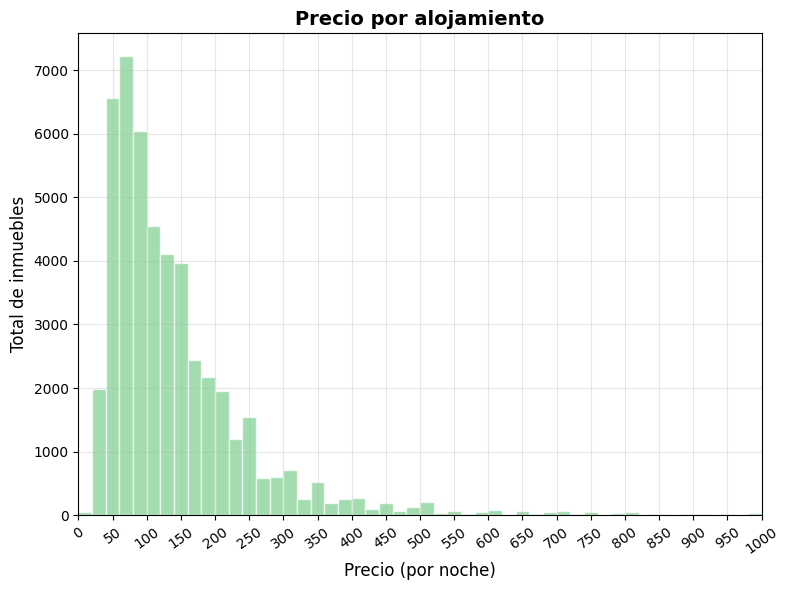

In [66]:
# Histograma de precio por alojamiento en el DataFrame

# Personalizar gráfico
plt.figure(figsize=(8,6))
plt.hist(df['price'], bins=500, edgecolor="white", alpha=0.7, color="#7CCF8E")

# Personalizar etiquetas y estilo
plt.title("Precio por alojamiento", fontsize=14, fontweight='bold')
plt.xlabel("Precio (por noche)", fontsize=12)
plt.ylabel("Total de inmuebles", fontsize=12)
plt.xticks(range(0, 1001, 50), rotation=35)
plt.xlim(0,1000)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [67]:
# Detalle del tipo de alquiler de cada inmueble del DataFrame
tipo_hab = df['room_type'].value_counts()
print(tipo_hab)

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


/tmp/ipykernel_2612/2879606230.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette=colores)


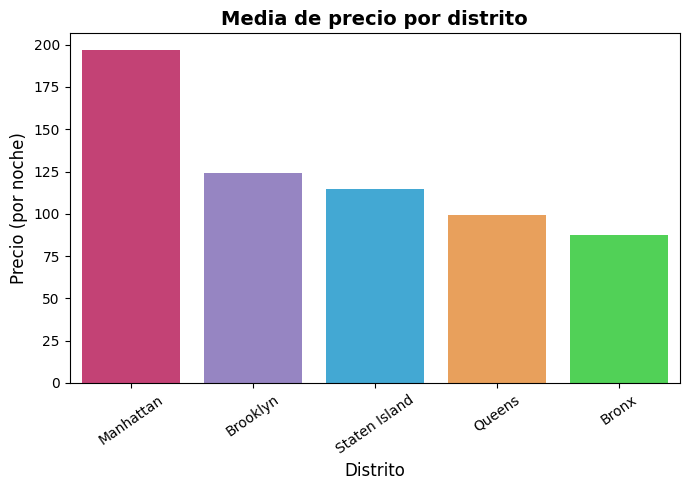

In [68]:
# Gráfico de la media del precio por alojamiento por distrito

# Personalizar gráfico
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending = False)
plt.figure(figsize=(7,5))
colores = {"Manhattan": "#D82D71", "Brooklyn": "#927BCC", "Queens": "#FF9F45", "Bronx": "#3CE644","Staten Island": "#2BB2EB"}
sns.barplot(x=avg_price.index, y=avg_price.values, palette=colores)

# Personalizar etiquetas y estilo
plt.xticks(rotation = 35)
plt.title("Media de precio por distrito", fontsize=14, fontweight="bold")
plt.xlabel("Distrito", fontsize=12)
plt.ylabel("Precio (por noche)", fontsize=12)
plt.tight_layout()
plt.show()

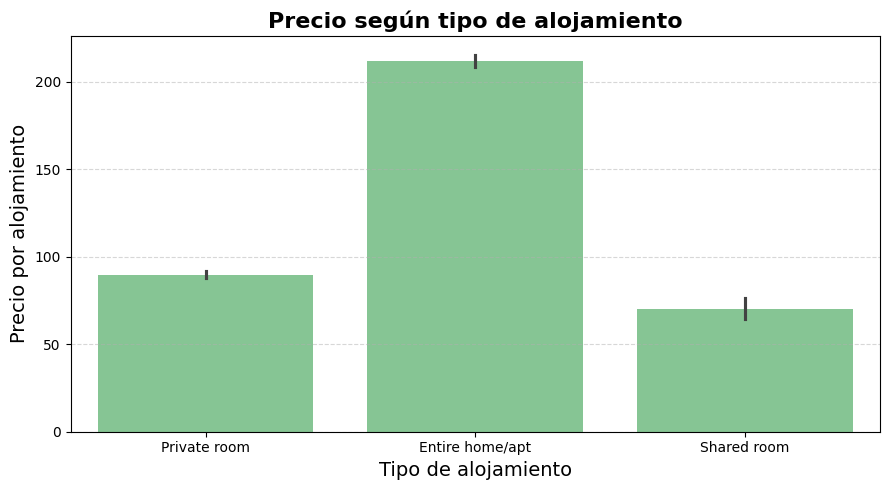

In [69]:
# Gráfica de tipos de alojamientos por precio

# Personalizar gráfico
fig, ax = plt.subplots(figsize=(9, 5)) 
sns.barplot(ax=ax, data = df, x = "room_type", y = "price", color="#7CCF8E")

# Personalizar etiquetas y estilo
ax.set_title("Precio según tipo de alojamiento", fontsize=16, fontweight="bold")
ax.set_xlabel("Tipo de alojamiento", fontsize=14)
ax.set_ylabel("Precio por alojamiento", fontsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

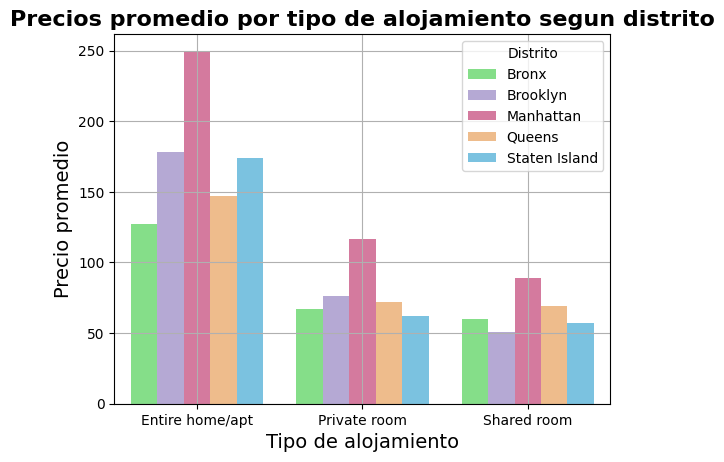

In [78]:
# Precios promedio agrupados por tipo de alojamiento segun distrito
avg_price = df.groupby(['room_type', 'neighbourhood_group'])['price'].mean().reset_index()

# Crear el gráfico
colores = {"Manhattan": "#D82D71", "Brooklyn": "#927BCC", "Queens": "#FF9F45", "Bronx": "#3CE644","Staten Island": "#2BB2EB"}
sns.barplot(data=avg_price, x='room_type', y='price', hue='neighbourhood_group', palette=colores, alpha=0.7)

# Personalizar etiquetas y estilo
plt.title("Precios promedio por tipo de alojamiento segun distrito", fontsize=16, fontweight="bold")
plt.ylabel("Precio promedio", fontsize=14)
plt.xlabel("Tipo de alojamiento", fontsize=14)
plt.legend(title="Distrito")
plt.grid(True)
plt.show()

In [71]:
#Elimino columnas que no me son de interés del DataFrame
elim_columnas = ["id", "name", "host_name", "last_review", "calculated_host_listings_count"]
df.drop(elim_columnas, axis=1, inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0


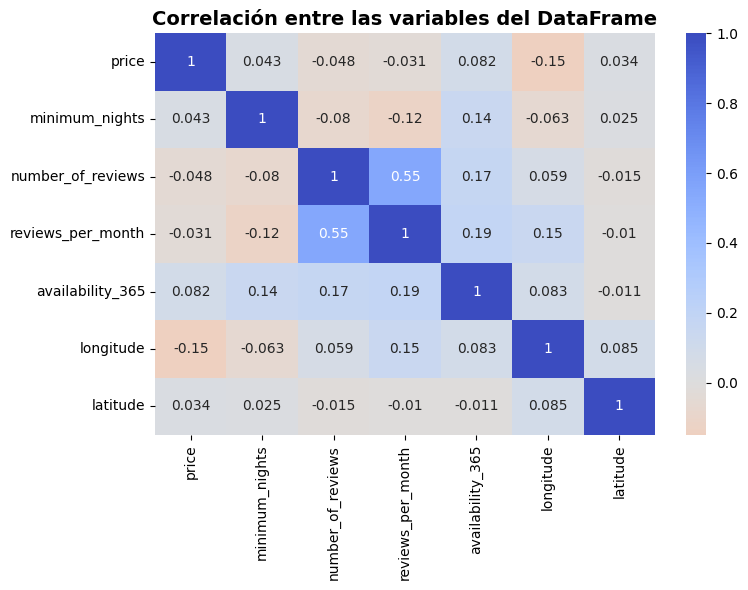

In [80]:
#Mapa de calor para buscar correlaciones entre los datos

plt.figure(figsize=(8, 6))
numeric_cols = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "availability_365", "longitude", "latitude"]
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm_r', center=0)
plt.title("Correlación entre las variables del DataFrame", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

Según el mapa de calor hay muy poca relación entre los datos analiazados, siendo las únicas que tienen una relación estrecha al compartir naturaleza "reseñas por mes" vs "número de reseñas", "latitude" vs "longitude".

No obstante lo anterior, aun con estos datos podemos ver relaciones que guardan cierta lógica, como:
mayor disponibilidad = mayor número de reseñas / reseñas por mes
longitude (siendo un indicador de ubicación) = precio (compartiendo también con reseñas por mes)








In [ ]:
#Calcular precios más altos y bajos en el dataset

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites inferior y superior para identificar los outliers en el precio son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites inferior y superior para identificar los outliers en el precio son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [82]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,365.000000


In [86]:
#Calcular por estadia menor número de noches a mayor en el dataset

Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites inferior y mayor para identificar los outliners en minimum nigths son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites inferior y mayor para identificar los outliners en minimum nigths son 11.0 y -5.0, con un rango intercuartílico de 4.0


In [88]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,365.000000


In [89]:
minimum_nigths_altas = df[df['minimum_nights'] >= 17]
minimum_nigths_altas

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,0
14,11975,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,0.22,0
36,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,365
45,49670,Brooklyn,Prospect-Lefferts Gardens,40.65944,-73.96238,Entire home/apt,150,29,11,0.49,95
55,56512,Brooklyn,Williamsburg,40.70881,-73.95930,Entire home/apt,150,30,105,0.90,30
...,...,...,...,...,...,...,...,...,...,...,...
48810,274014453,Manhattan,Upper West Side,40.79952,-73.96003,Private room,75,30,0,NaN,90
48843,53966115,Brooklyn,Bedford-Stuyvesant,40.69635,-73.93743,Private room,45,29,0,NaN,341
48871,144008701,Manhattan,Harlem,40.82233,-73.94687,Private room,35,29,0,NaN,31
48879,540335,Brooklyn,Williamsburg,40.71728,-73.94394,Entire home/apt,120,20,0,NaN,22


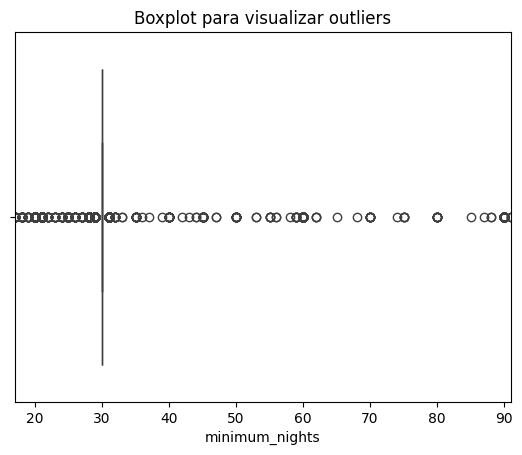

In [94]:
#Gráfico para visualizar datos fuera de rango (outliers)

sns.boxplot(x=minimum_nigths_altas['minimum_nights'])
plt.xlim(17, 91)
plt.title('Boxplot para visualizar outliers')
plt.show()

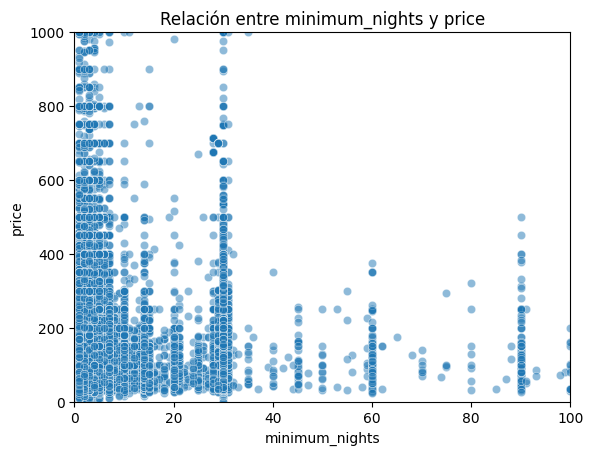

In [97]:

sns.scatterplot(data=df, x='minimum_nights', y='price', alpha=0.5)
plt.title('Relación entre minimum_nights y price')
plt.xlim(0, 100) 
plt.ylim(0, 1000)  
plt.show()

In [107]:
#Eliminamos todo lo superior a 91 días, imaginando que el mínimo para alquilar sean 3 meses
df_filtrado = df[df['minimum_nights'] <= 91]
eliminados = df[df['minimum_nights'] > 91]
print(f"Se han eliminado {len(eliminados)} registros con requisito mayor igual a 91 noches mínimas")

Se han eliminado 194 registros con requisito mayor igual a 91 noches mínimas


In [108]:
# Dividimos el conjunto de datos en muestras de train y test
X = df_filtrado.drop("price", axis = 1)
y = df_filtrado["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

X_train.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
508,39260,Manhattan,East Harlem,40.79056,-73.94680,Entire home/apt,2,86,0.91,268
6924,25517905,Manhattan,Upper West Side,40.79620,-73.96156,Private room,1,277,5.44,294
43678,96219565,Queens,Flushing,40.75908,-73.80845,Entire home/apt,3,2,2.00,360
1661,869880,Manhattan,East Village,40.73233,-73.98695,Private room,5,64,0.88,316
24367,63480384,Brooklyn,Prospect-Lefferts Gardens,40.65473,-73.96112,Entire home/apt,2,4,0.36,86


In [109]:
num_variables = ["latitude", "longitude", "minimum_nights", "number_of_reviews", "availability_365"]


In [110]:
# instancio el escalador
scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[num_variables])

# aplico el escalador en amhos
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()

,latitude,longitude,minimum_nights,number_of_reviews,availability_365
508,1.130257,0.113837,-0.417204,1.405167,1.179072
6924,1.233735,-0.204110,-0.518017,5.684819,1.376568
43678,0.552687,3.094058,-0.316390,-0.476983,1.877904
1661,0.061899,-0.751040,-0.114763,0.912223,1.543680
24367,-1.361844,-0.194632,-0.417204,-0.432170,-0.203400


In [111]:
cat_variables = ["neighbourhood_group","room_type"]


In [112]:
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

# instancio el encoder
label_encoder_neighbourhood_group = LabelEncoder()
label_encoder_room_type = LabelEncoder()

# entreno el encoder con los datos de entrenamiento
label_encoder_neighbourhood_group .fit(X_train['neighbourhood_group'])
label_encoder_room_type.fit(X_train['room_type'])

# aplico el encoder en ambos
X_train_cat_le['neighbourhood_group_le'] = label_encoder_neighbourhood_group.transform(X_train['neighbourhood_group'])
X_train_cat_le['room_type_le'] = label_encoder_room_type.transform(X_train['room_type'])

X_test_cat_le['neighbourhood_group_le'] = label_encoder_neighbourhood_group.transform(X_test['neighbourhood_group'])
X_test_cat_le['room_type_le'] = label_encoder_room_type.transform(X_test['room_type'])

X_train_cat_le.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,neighbourhood_group_le,room_type_le
508,39260,Manhattan,East Harlem,40.79056,-73.94680,Entire home/apt,2,86,0.91,268,2,0
6924,25517905,Manhattan,Upper West Side,40.79620,-73.96156,Private room,1,277,5.44,294,2,1
43678,96219565,Queens,Flushing,40.75908,-73.80845,Entire home/apt,3,2,2.00,360,3,0
1661,869880,Manhattan,East Village,40.73233,-73.98695,Private room,5,64,0.88,316,2,1
24367,63480384,Brooklyn,Prospect-Lefferts Gardens,40.65473,-73.96112,Entire home/apt,2,4,0.36,86,1,0


In [113]:

X_train_cat_le.to_csv('../data/processed/X_train_cat_le.csv')
X_test_cat_le.to_csv('../data/processed/X_test_cat_le.csv')
y_train.to_csv('../data/processed/y_train.csv')
y_test.to_csv('../data/processed/y_test.csv')